<a href="https://colab.research.google.com/github/sumitha9020/Elevatelabs_Tasks/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Decision Tree Accuracy: 0.8390243902439024

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205


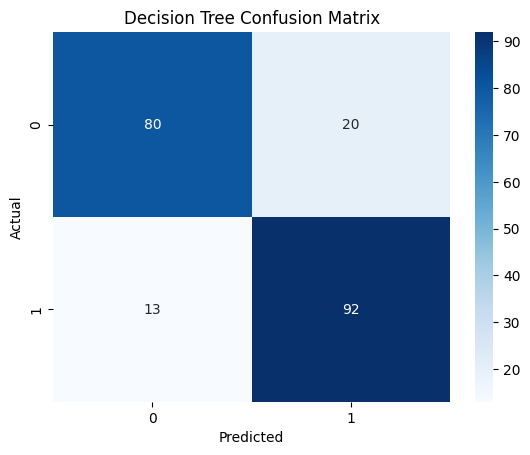

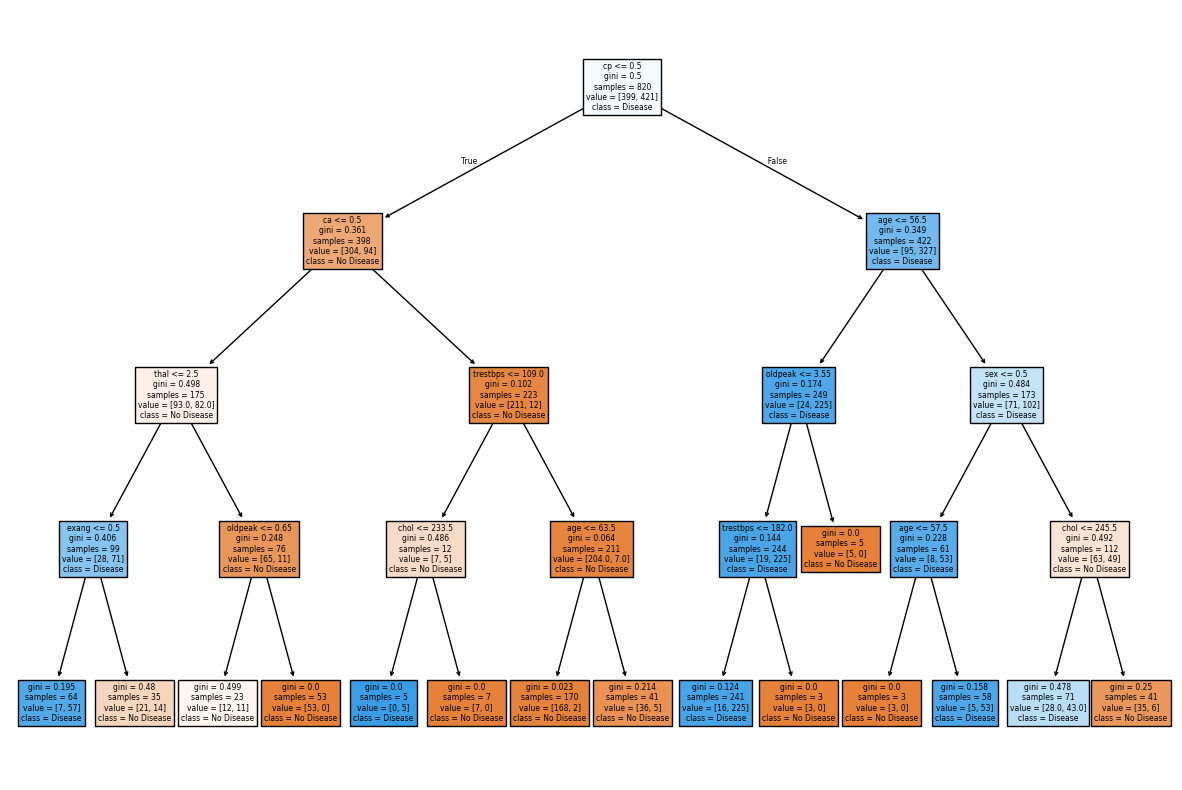


Random Forest Accuracy: 1.0

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



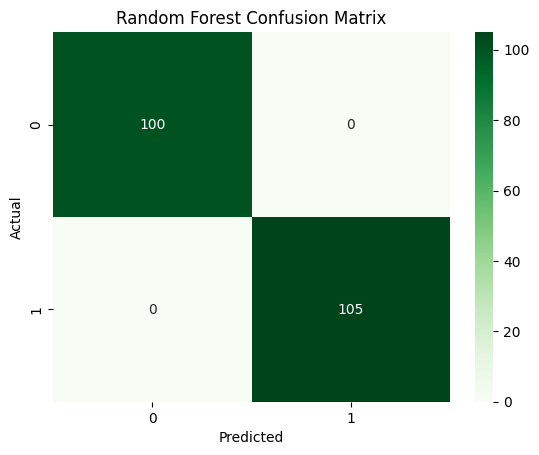

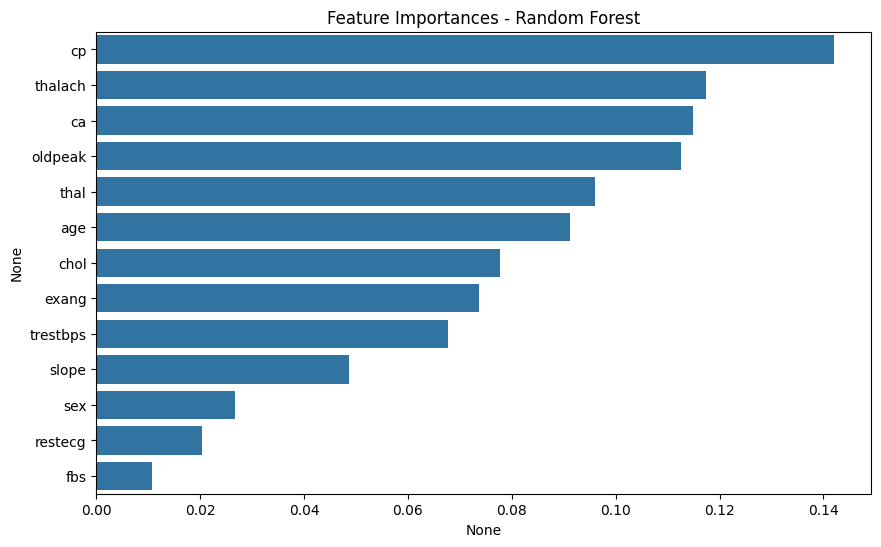


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073


In [6]:
# Task 5: Decision Trees and Random Forests

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load dataset
# (Heart Disease Dataset from Kaggle)
df = pd.read_csv("/content/heart.csv")
print("Dataset shape:", df.shape)
print(df.head())

# Features & Target
X = df.drop("target", axis=1)
y = df["target"]

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

y_pred_tree = dtree.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dtree, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

# 4. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5. Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances - Random Forest")
plt.show()

# 6. Cross-validation Accuracy
cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))